# Assessed Problem #3

<html>
    <body>
        <p>$ Imagine \ a \ system \ with \ an \ initial \ amplitude \ \theta_0 \ at \ the \ point \ when \ t \ = \ 0 \ and \ at \ a \ point \ t' \ after \ it \ is \ release \ from \ equilibrium. $</p>
        <p>$ Assuming \ there \ is \ no \ drag, \ friction \ or \ any \ other \ source \ of \ energy \ loss $</p>
        <img src = "https://i.imgur.com/kNVRDHo.png"\>

<p>$E_1 = E_{1_{GPE}} + E_{1_{KE}} = mg(L-LCos(\theta_0) + 0$</p>

<p>$E_2 = E_{2_{GPE}} + E_{2_{KE}} = mg(L-LCos(\theta) + \frac{1}{2}m(L\frac{d\theta}{dt})^2$</p>

<p>$Conservation \ of \ energy \ dictates \ that \ the \ energies \ must \ be \ equivalent: $</p>

<p>$E_1 = E_2$</p>

<p>$mg(L-LCos(\theta_0)) = mg(L-Lcos(\theta) + \frac{1}{2}m(L\frac{d\theta}{dt})^2$</p>

<p>$g(1-Cos(\theta_0)) = g(1-Cos(\theta) + \frac{1}{2}L(\frac{d\theta}{dt})^2$</p>

<p>$\sqrt{\frac{2g}{L}(Cos(\theta)-Cos(\theta_0))} = \frac{d\theta}{dt}$</p>

<p>$dt = \sqrt{\frac{L}{g}}\frac{1}{\sqrt{2(Cos(\theta) - Cost(\theta_0)}}$</p>

<p>$\int_{0}^{\frac{T}{4}}dt = \sqrt{\frac{L}{g}}\int_{0}^{\theta_0}\frac{d\theta}{\sqrt{2(Cos(\theta) - Cost(\theta_0)}}$</p>

<p>$Going \ from \ 0 \ to \ the \ amplitude \ only \ accounts \ for \ a \ quarter \ of \ the \ full \ oscillation \ and \ therefore \ only \ covers \\ one \ quarter \ of \ the \ Time \ period \ for \ this \ oscillation. \\ \ \\ To \ correct \ for \ this, \ multiplying \ by \ 4 \ gives \ the \ full \ time \ period \ of \ the \ oscillation.$</p>

<p>$T = 4\sqrt{\frac{L}{g}}\int_{0}^{\theta_0}\frac{d\theta}{\sqrt{2(Cos(\theta) - Cost(\theta_0)}} \ \ \ \ \ as \ reqd.$</p>

The point where the error on the Small Angle Expression graph reaches 1% is at θ₀ = 0.399


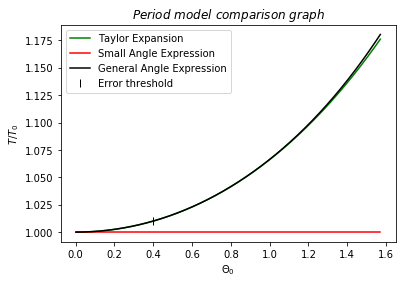

In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
#
#Define Subroutines
def f(Theta0): #Returns the h'() function for that specific value of Theta0, This function will be integrated later
    def h(x):  #Returns the value h'() which needs integrating before plotting
        return 2/np.pi/np.sqrt(2*np.cos(x) - 2*np.cos(Theta0))
    return h

def expansion(x):
    return 1+x**2/16+11*x**4/3072
#

X = np.linspace(0.0,np.pi/2,1000)[1:]
y = []
for x in X:
    fx = f(x)
    y.append(integrate.quad(fx,0.,x)[0])

plt.plot(X, expansion(X), 'g-', label = "Taylor Expansion"        )
plt.plot(X,[1]*len(X)   , 'r-', label = "Small Angle Expression"  )
plt.plot(X, y           , 'k-', label = "General Angle Expression")

error = 0
for i in range(len(X)):
    if (error < 1.01 and y[i] > 1.01):
        plt.plot(X[i],y[i], 'k|',markersize = 8, label = "Error threshold")
        print ("The point where the error on the Small Angle Expression graph reaches 1% is at θ₀ = {:.3f}".format(X[i]))
    error = y[i]
    
plt.title("$Period \ model \ comparison \ graph$")
plt.xlabel("$\Theta_0$")
plt.ylabel("$T/T_0$")
plt.legend()
plt.show()